In [32]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Linear Regression

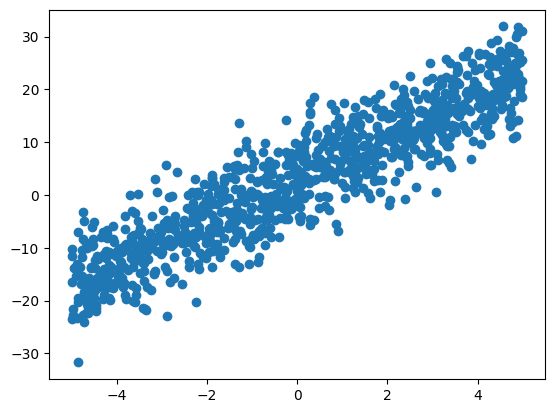

In [33]:
# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5 # X in range (-5, 5)
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n) #Y is generated from the equation: Y = 4X + 3 + noise where noise is Gaussian with mean 0 and std deviation 5.

plt.figure()
plt.scatter(
    X,
    Y
)


MSE (GD):  25.497787933084865


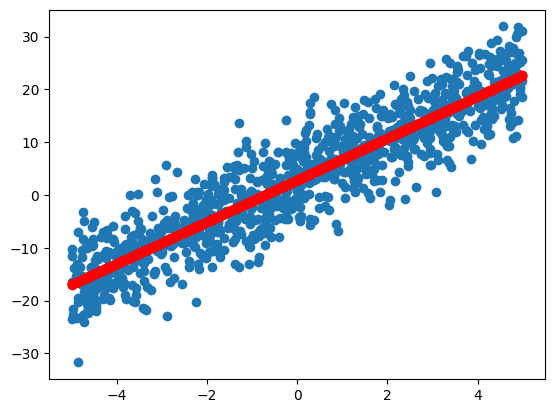

In [34]:
def Y_based_on_X(x,a,b):
  return a*x +b

# Gradient Descent
a,b = 0,0
l = 0.01

def compute_loss(X, Y, a, b):
  return np.mean((Y - Y_based_on_X(X,a,b))**2)/2
#define your descend function here
def gradient_descent(X, Y, a, b, lr, iters):
  n = len(X)
  for i in range(iters):
    Y_pred = Y_based_on_X(X,a,b)
    error = Y_pred - Y
    a -= lr * (1/n) * np.dot(X.T, error)
    b -= lr * (1/n) * np.sum(error)
  return a, b

a, b = gradient_descent(X, Y, a, b, l, 1000)
mse = mean_squared_error(Y, Y_based_on_X(X,a,b))
print("MSE (GD): ", mse)

plt.figure()
plt.scatter(
    X,
    Y
)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")
plt.show()

In [14]:
# Closed form SOlution
# Go through this code. This code is just for learning the closed form solution
#This closed-form solution snippet implements Ordinary Least Squares (OLS) linear regression using matrix algebra, also known as the Normal Equation

X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[2.98065507],
        [3.98125082]])

As you can see the values that we get for the model are extremely close to the 3 and 4 parameters that we initially set up.

TO TRY:
1. Try varying n and see how that affects the accuracy.
2. Implement the same using GD.
3. Implement the same using SGD with m = 100 and n = 1000.

In [35]:
def SGD(X, Y, a, b, lr, iters, batch_size):
  n = len(X)
  for i in range(iters):
    for j in range(0, n, batch_size):
      X_batch = X[j:j+batch_size]
      Y_batch = Y[j:j+batch_size]
      Y_pred = Y_based_on_X(X_batch, a, b)
      error = Y_pred - Y_batch
      a -= lr * (1/batch_size) * np.dot(X_batch.T, error)
      b -= lr * (1/batch_size) * np.sum(error)
  return a, b

In [36]:
def data(n):
  X = 10* np.random.random(n) - 5 # X in range (-5, 5)
  Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)
  return X, Y

MSE (SGD):  25.50800327799664


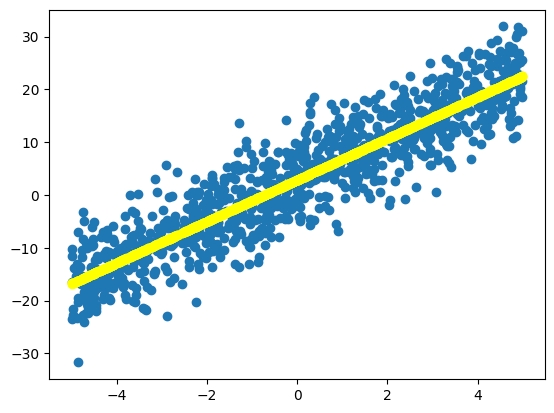

In [37]:
a_SGD,b_SGD = SGD(X, Y, a, b, l, 1000, 100)
mse = mean_squared_error(Y, Y_based_on_X(X,a_SGD,b_SGD))
print("MSE (SGD): ", mse)
plt.figure()
plt.scatter(
    X,
    Y
)
plt.scatter(X,Y_based_on_X(X,a_SGD,b_SGD),c = "yellow")
plt.show()

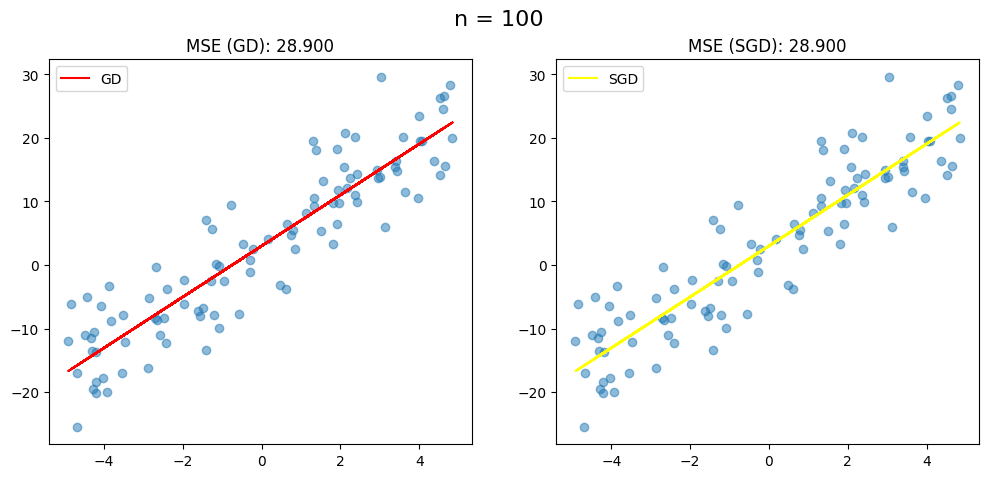

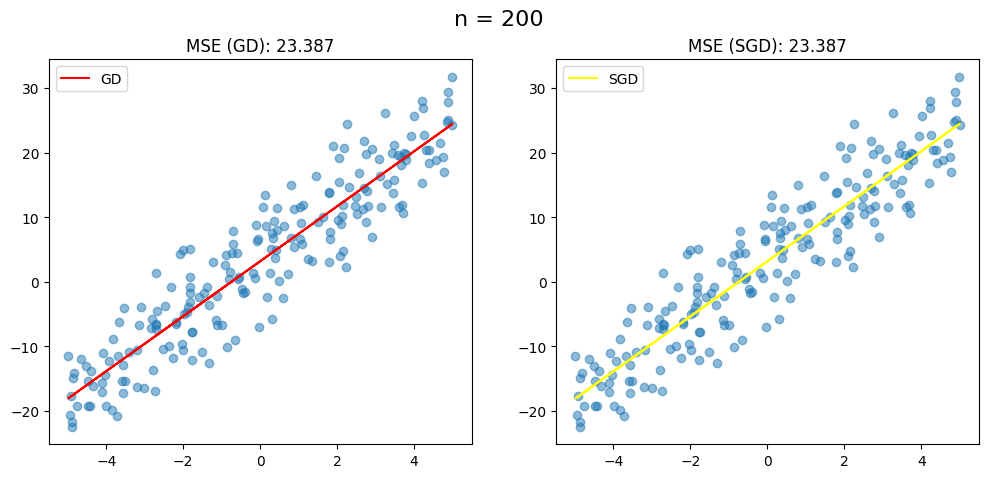

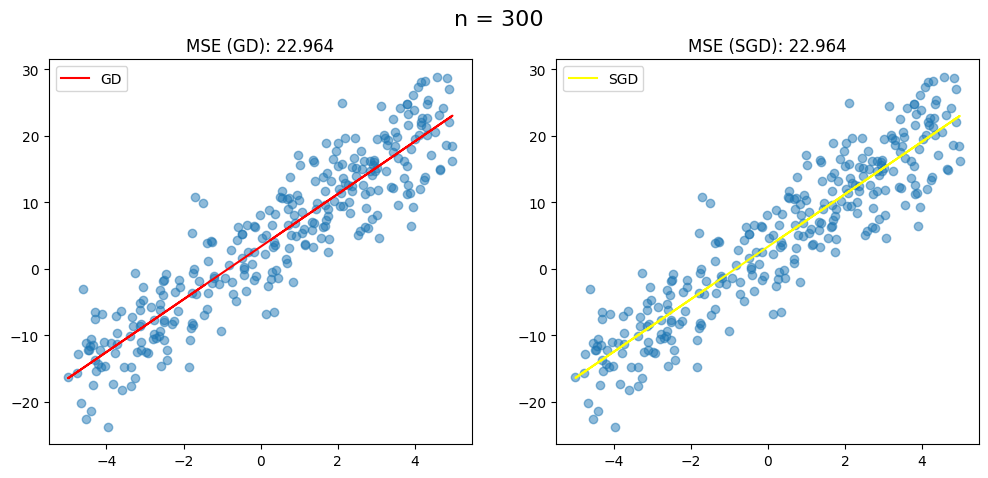

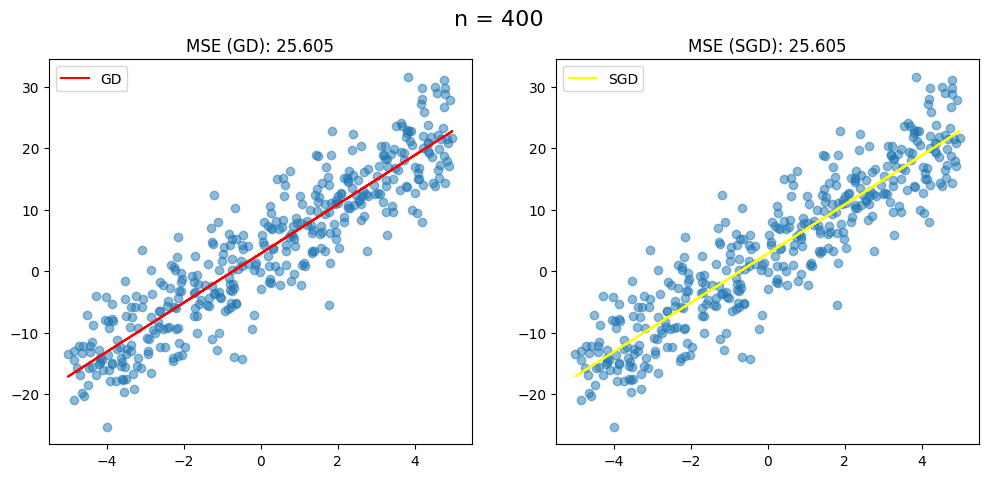

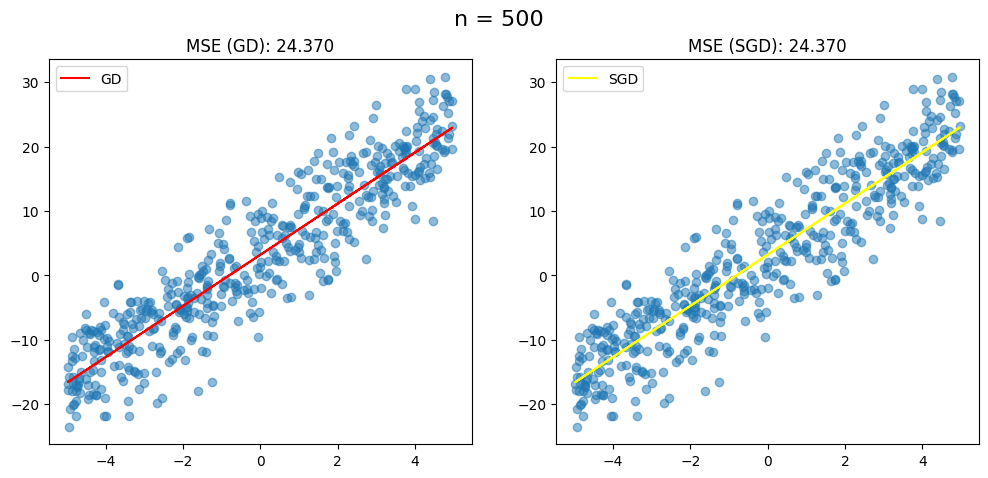

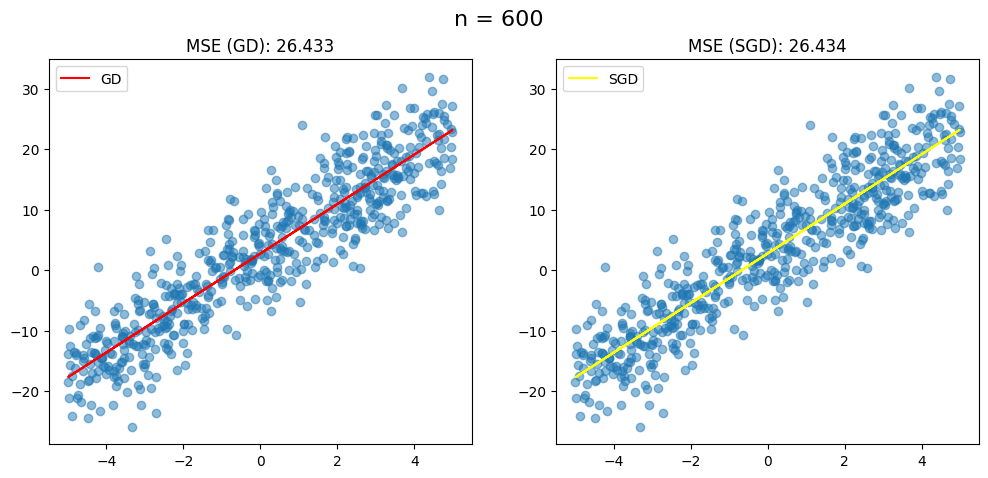

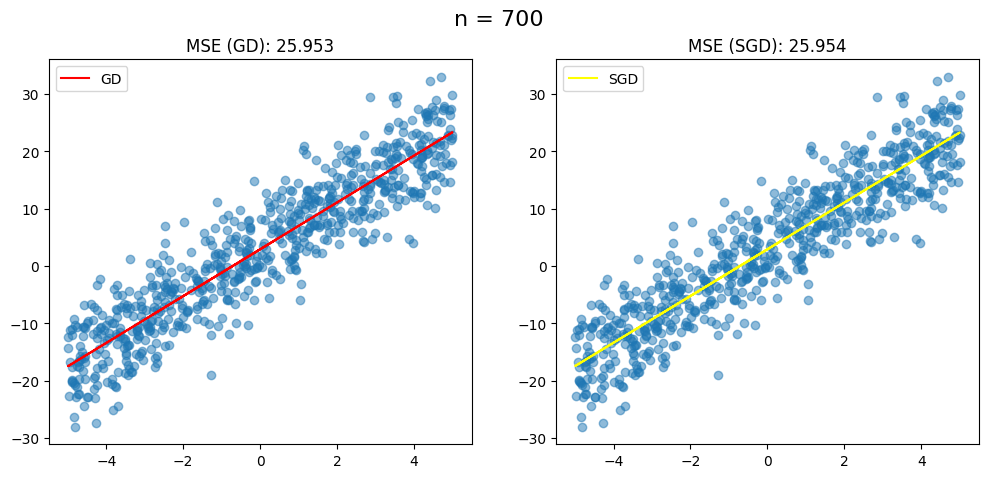

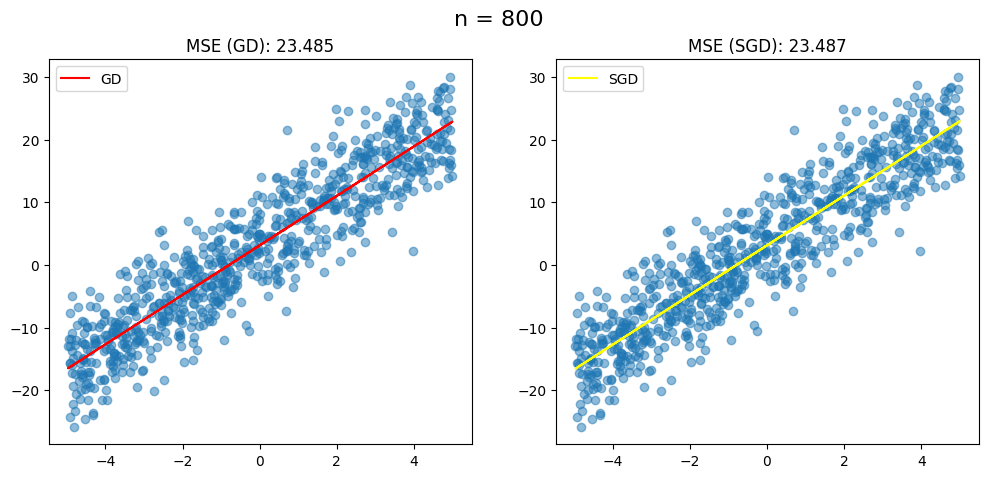

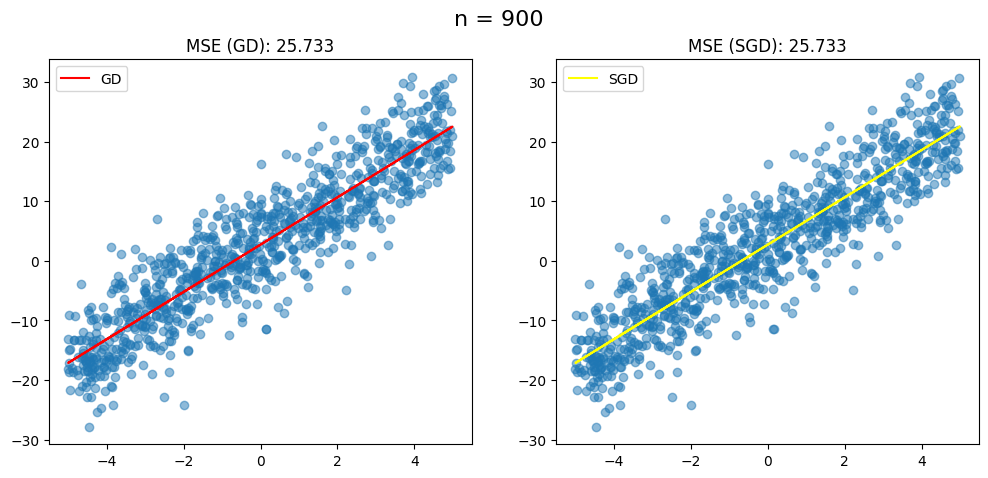

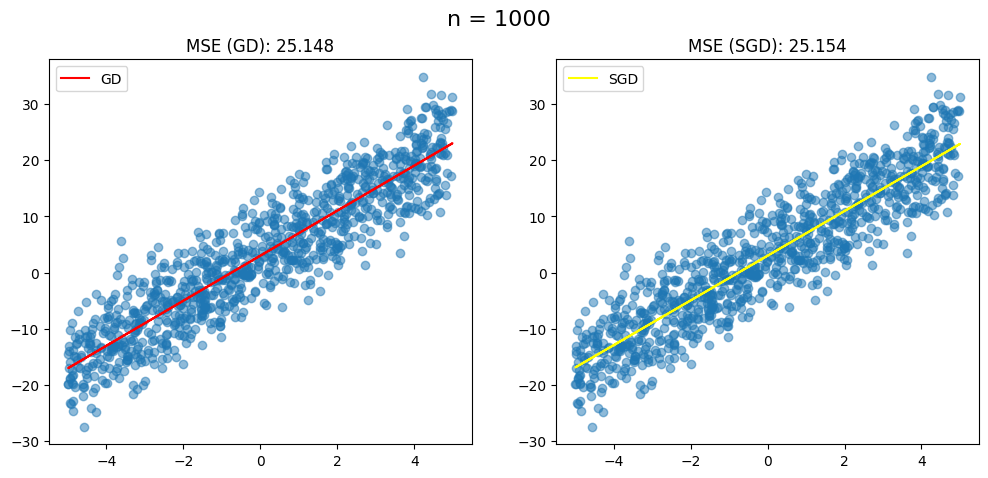

In [49]:
n = np.linspace(100, 1000, 10, dtype = "int")
for i in n:
  X, Y = data(i)
  a,b = 0,0
  l = 0.01
  a_GD,b_GD = gradient_descent(X, Y, a, b, l, 1000)
  a_SGD,b_SGD = SGD(X, Y, a, b, l, 1000, 100)
  mse_gd = mean_squared_error(Y, Y_based_on_X(X,a_GD,b_GD))
  mse_sgd = mean_squared_error(Y, Y_based_on_X(X,a_SGD,b_SGD))
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle(f"n = {i}", fontsize=16)
  axs[0].scatter(X, Y, alpha=0.5)
  axs[0].plot(X, Y_based_on_X(X, a_GD, b_GD), color='red', label='GD')
  axs[0].set_title(f"MSE (GD): {mse_gd:.3f}")
  axs[0].legend()
  axs[1].scatter(X, Y, alpha=0.5)
  axs[1].plot(X, Y_based_on_X(X, a_SGD, b_SGD), color='yellow', label='SGD')
  axs[1].set_title(f"MSE (SGD): {mse_sgd:.3f}")
  axs[1].legend()
  plt.show()